In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_dd4025c279df4f16b91f6cf10cf5b3ed = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7ITxTArvRSJA1HqOVXEDHT9R-zCP2kVgVYLKpJNViGUP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_dd4025c279df4f16b91f6cf10cf5b3ed.get_object(Bucket='datascience-donotdelete-pr-9i2b3zs0qw19l3',Key='RTC Location 2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head(3) 


,Date,Police_ref,Easting,Northing,Severity,Road_cond,Visibility,Casualties,Pedestrian,Cycles,...,Cross_ctrl,Cross_fac,Weather,SpCond,Carr_haz,Day,Location,Local_Auth,ReportedAt,Parish
0,20180101,18263388,519784,299454,2. Serious,2. Wet/Damp,4. Darkness: street lights present and lit,1,0,0,...,0. None,1. Zebra crossing,1. Fine without high winds,0,0. None,2. Monday,EASTFIELD ROAD AT JN WITH PADHOLME ROAD,E06000031,1. Yes,181
1,20180102,18257386,519682,270658,3. Slight,2. Wet/Damp,6. Darkness: no street lighting,2,0,0,...,0. None,0. None within 50m,1. Fine without high winds,0,0. None,3. Tuesday,NEAR BRAMPTON HUT SERVICES SOUTBOUND A1 NEAR J...,E07000011,1. Yes,26
2,20180103,18259484,540715,242553,3. Slight,1. Dry,6. Darkness: no street lighting,1,0,0,...,0. None,0. None within 50m,4. Fine with high winds,0,0. None,4. Wednesday,BARLEY ROAD B1368,E07000012,1. Yes,95


In [2]:
df = df_data_1[['Police_ref', 'Casualties', 'Vehicles', 'Roadnum1','Speed_Lim']] 

import numpy as np
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

# Create the dictionary 
sev_dict ={'1. Fatal' : 1, '2. Serious' : 2, '3. Slight' : 3}  
# Add a new column named 'Sev'
df['Sev'] = df_data_1['Severity'].apply(set_value, args =(sev_dict, ))  

road_dict ={'1. Dry' : 20, '2. Wet/Damp' : 40, '3. Snow' : 60, '4. Frost/Ice' : 80}     
df['Road'] = df_data_1['Road_cond'].apply(set_value, args =(road_dict, ))  

vis_dict ={'1. Daylight' : 10, '4. Darkness: street lights present and lit' : 40, '5. Darkness: street lights present but unlit' : 50,
           '6. Darkness: no street lighting' : 60, '7. Darkness: street lighting unknown' : 70}
df['Vis'] = df_data_1['Visibility'].apply(set_value, args =(vis_dict, ))  

weat_dict ={'1. Fine without high winds' : 10, '2. Raining without high winds' : 20, '3. Snowing without high winds' : 30,
           '4. Fine with high winds' : 40, '5. Raining with high winds' : 50, '6. Snowing with high winds' : 60, 
          '7. Fog or mist' : 70, '8. Other' : 75, '9. Unknown' : 80
           } 
df['Weat'] = df_data_1['Weather'].apply(set_value, args =(weat_dict, ))  

sum_col = df_data_1['Pedestrian'] + df_data_1['Cycles'] + df_data_1['P2W'] + df_data_1['OAPs'] + df_data_1['Children']
df['Incidental'] = sum_col 

df.head(3) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,Police_ref,Casualties,Vehicles,Roadnum1,Speed_Lim,Sev,Road,Vis,Weat,Incidental
0,18263388,1,2,0,30,2,40,40,10,0
1,18257386,2,2,1,40,3,40,60,10,0
2,18259484,1,1,1368,30,3,20,60,40,0


In [3]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 

X = np.asarray(df[['Road', 'Vis', 'Weat', 'Speed_Lim']]) 
y = df[['Casualties']] 

In [4]:
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X) 
X[0:5] 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.27756184,  1.0778083 , -0.34187424, -0.81710103],
       [ 1.27756184,  2.18008443, -0.34187424, -0.20512428],
       [-0.53231743,  2.18008443,  1.65507028, -0.81710103],
       [-0.53231743,  1.0778083 , -0.34187424, -1.42907777],
       [ 1.27756184,  2.18008443,  1.65507028,  0.40685246]])

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

print('Train set:', X_train.shape, y_train.shape) 
print('Test set:', X_test.shape, y_test.shape) 

Train set: (901, 4) (901, 1)
Test set: (901, 4) (901, 1)


In [21]:
from sklearn.metrics import confusion_matrix 
LR = LogisticRegression(solver='liblinear').fit(X_train, y_train) 
yhat = LR.predict(X_test) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
yhat_prob = LR.predict_proba(X_test) 
yhat_prob 

array([[0.62339562, 0.23051897, 0.0895502 , ..., 0.00578312, 0.01232621,
        0.00715713],
       [0.79681359, 0.12043357, 0.03811123, ..., 0.0049982 , 0.00570224,
        0.00615813],
       [0.75464231, 0.14286984, 0.05239337, ..., 0.003791  , 0.00900629,
        0.00604108],
       ...,
       [0.56111037, 0.25555828, 0.10775403, ..., 0.01307897, 0.0125289 ,
        0.00883633],
       [0.76496598, 0.16487734, 0.03975512, ..., 0.00412233, 0.00444264,
        0.00588904],
       [0.79681359, 0.12043357, 0.03811123, ..., 0.0049982 , 0.00570224,
        0.00615813]])

In [23]:
from sklearn.metrics import f1_score 
from sklearn.metrics import jaccard_similarity_score 
f1_score(y_test, yhat, average='weighted') 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6076156349137719

In [24]:
jaccard_similarity_score(y_test, yhat) 

0.7236403995560489

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
print ('Train set:', X_train,  y_train)
print ('Test set:', X_test,  y_test) 

Train set: [[ 1.27756184  1.0778083  -0.34187424 -0.81710103]
 [ 1.27756184  2.18008443 -0.34187424  1.01882921]
 [ 1.27756184 -0.57560591 -0.34187424  1.01882921]
 ...
 [-0.53231743  2.18008443 -0.34187424  1.63080595]
 [-0.53231743 -0.57560591 -0.34187424 -0.20512428]
 [-0.53231743  2.7312225  -0.34187424  1.63080595]]       Casualties
1628           1
17             3
25             1
873            1
370            1
722            1
1222           1
1060           1
379            1
1784           2
642            3
1357           1
1491           1
1532           4
347            1
1792           1
1739           1
1189           1
1509           2
1383           1
465            1
1449           1
459            2
1467           2
736            1
601            1
1730           1
131            2
1221           1
1100           1
...          ...
1533           1
422            1
1737           2
149            1
533            2
183            1
1024           2
1411          

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)  

yhat = clf.predict(X_test)
yhat [0:5] 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1])

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')  

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6284215778710558

In [28]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat) 

0.7358490566037735

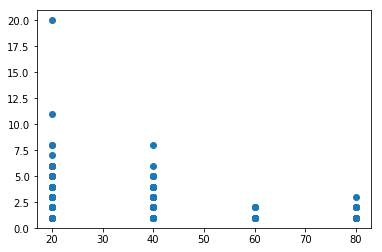

In [29]:
# Import seaborn
import seaborn as sns 

X = np.asarray(df[['Road']])
y = df[['Casualties']]  
plt.scatter(X, y) 

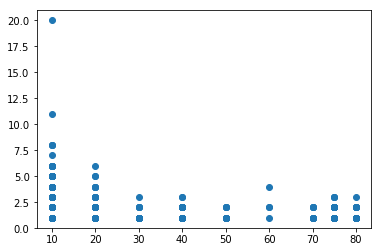

In [30]:
X = np.asarray(df[['Weat']])
y = df[['Casualties']]  
plt.scatter(X, y) 

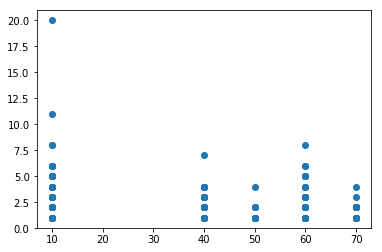

In [31]:
X = np.asarray(df[['Vis']])
y = df[['Casualties']]  
plt.scatter(X, y) 

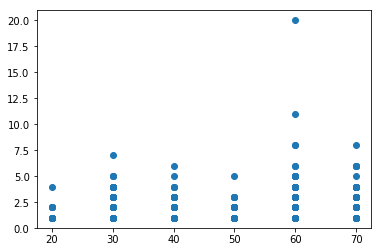

In [32]:
X = np.asarray(df[['Speed_Lim']])
y = df[['Casualties']]  
plt.scatter(X, y) 

In [33]:
df.groupby(['Sev','Weat'])['Casualties'].agg('sum') 

Sev  Weat
1    10        56
     20         4
     30         2
     70         4
2    10       483
     20        52
     30         4
     50         4
     60         4
     75         9
     80         8
3    10      1572
     20       191
     30        16
     40        40
     50        11
     60         5
     70        10
     75        53
     80        31
Name: Casualties, dtype: int64

In [34]:
df.groupby(['Sev','Vis'])['Casualties'].agg('sum') 

Sev  Vis
1    10       52
     40        3
     60       10
     70        1
2    10      383
     40       84
     50        2
     60       80
     70       15
3    10     1447
     40      285
     50       19
     60      137
     70       41
Name: Casualties, dtype: int64

In [35]:
df.groupby(['Sev','Speed_Lim'])['Casualties'].agg('sum') 

Sev  Speed_Lim
1    30             1
     40             2
     50             2
     60            45
     70            16
2    20            26
     30           184
     40            39
     50            22
     60           228
     70            65
3    20            55
     30           893
     40           157
     50            58
     60           483
     70           283
Name: Casualties, dtype: int64

In [36]:
df.groupby(['Sev','Roadnum1'])['Casualties'].agg('sum') 

Sev  Roadnum1
1    0             8
     10            5
     11            3
     14            6
     47           22
     141           5
     142           3
     285           1
     505           2
     1095          1
     1198          3
     1307          7
2    0           215
     1            15
     10           14
     11           11
     14           33
     15            4
     47           33
     141          17
     142           9
     428           8
     505           9
     603           7
     605           6
     645           2
     660           1
     661           1
     1040          4
     1043          4
                ... 
3    1098          6
     1099          7
     1101         25
     1102         10
     1109          1
     1123         14
     1129          6
     1134         38
     1139         43
     1166          4
     1167          6
     1169          1
     1179          6
     1187          7
     1198         19
     1260         22

In [37]:
df_test = df[['Road', 'Weat', 'Casualties']]
df_grp = df_test.groupby(['Road', 'Weat'], as_index=False).mean() 
df_grp.head() 

,Road,Weat,Casualties
0,20,10,1.431142
1,20,20,1.000000
2,20,40,1.562500
3,20,70,1.333333
4,20,75,1.777778


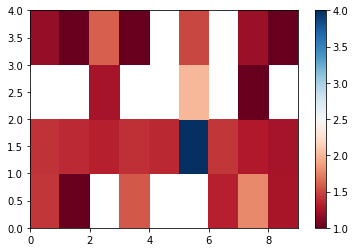

In [38]:
df_pivot = df_grp.pivot(index='Road', columns='Weat')
# Draw a heat map for Road Conditions and Weather against Casualties
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar() 